# Data analysis

## Description du jeu de données

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
data = pd.read_csv("DataEnergy-Student.csv")
n=data.shape[0]
p=data.shape[1]

In [27]:
data.head(10)

,Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,orientation,Glazing.area,Glazing.area.distr,Energy,Energy.efficiency
0,0.982928,530.489958,306.484593,112.002683,7.0,North,0.016095,0,34.263943,B
1,0.983547,519.872380,299.776324,110.048028,7.0,East,-0.009387,0,34.589751,B
2,0.979453,516.191221,303.374358,106.408431,7.0,South,-0.000697,0,38.778048,C
3,0.977733,518.924089,292.812213,113.055938,7.0,West,0.000010,0,37.947808,C
4,0.903029,552.968920,316.236102,118.366409,7.0,North,-0.006592,0,47.675859,D
5,0.890910,558.603691,314.916242,121.843724,7.0,East,-0.016121,0,41.908465,C
6,0.903150,559.749136,320.944671,119.402232,7.0,South,-0.002478,0,40.343593,C
7,0.898619,568.617081,322.671008,122.973037,7.0,West,-0.002595,0,44.145485,C
8,0.858579,591.923274,298.629324,146.646975,7.0,North,0.009041,0,46.843831,D
9,0.855403,596.268543,298.715776,148.776384,7.0,East,-0.009541,0,46.985437,D


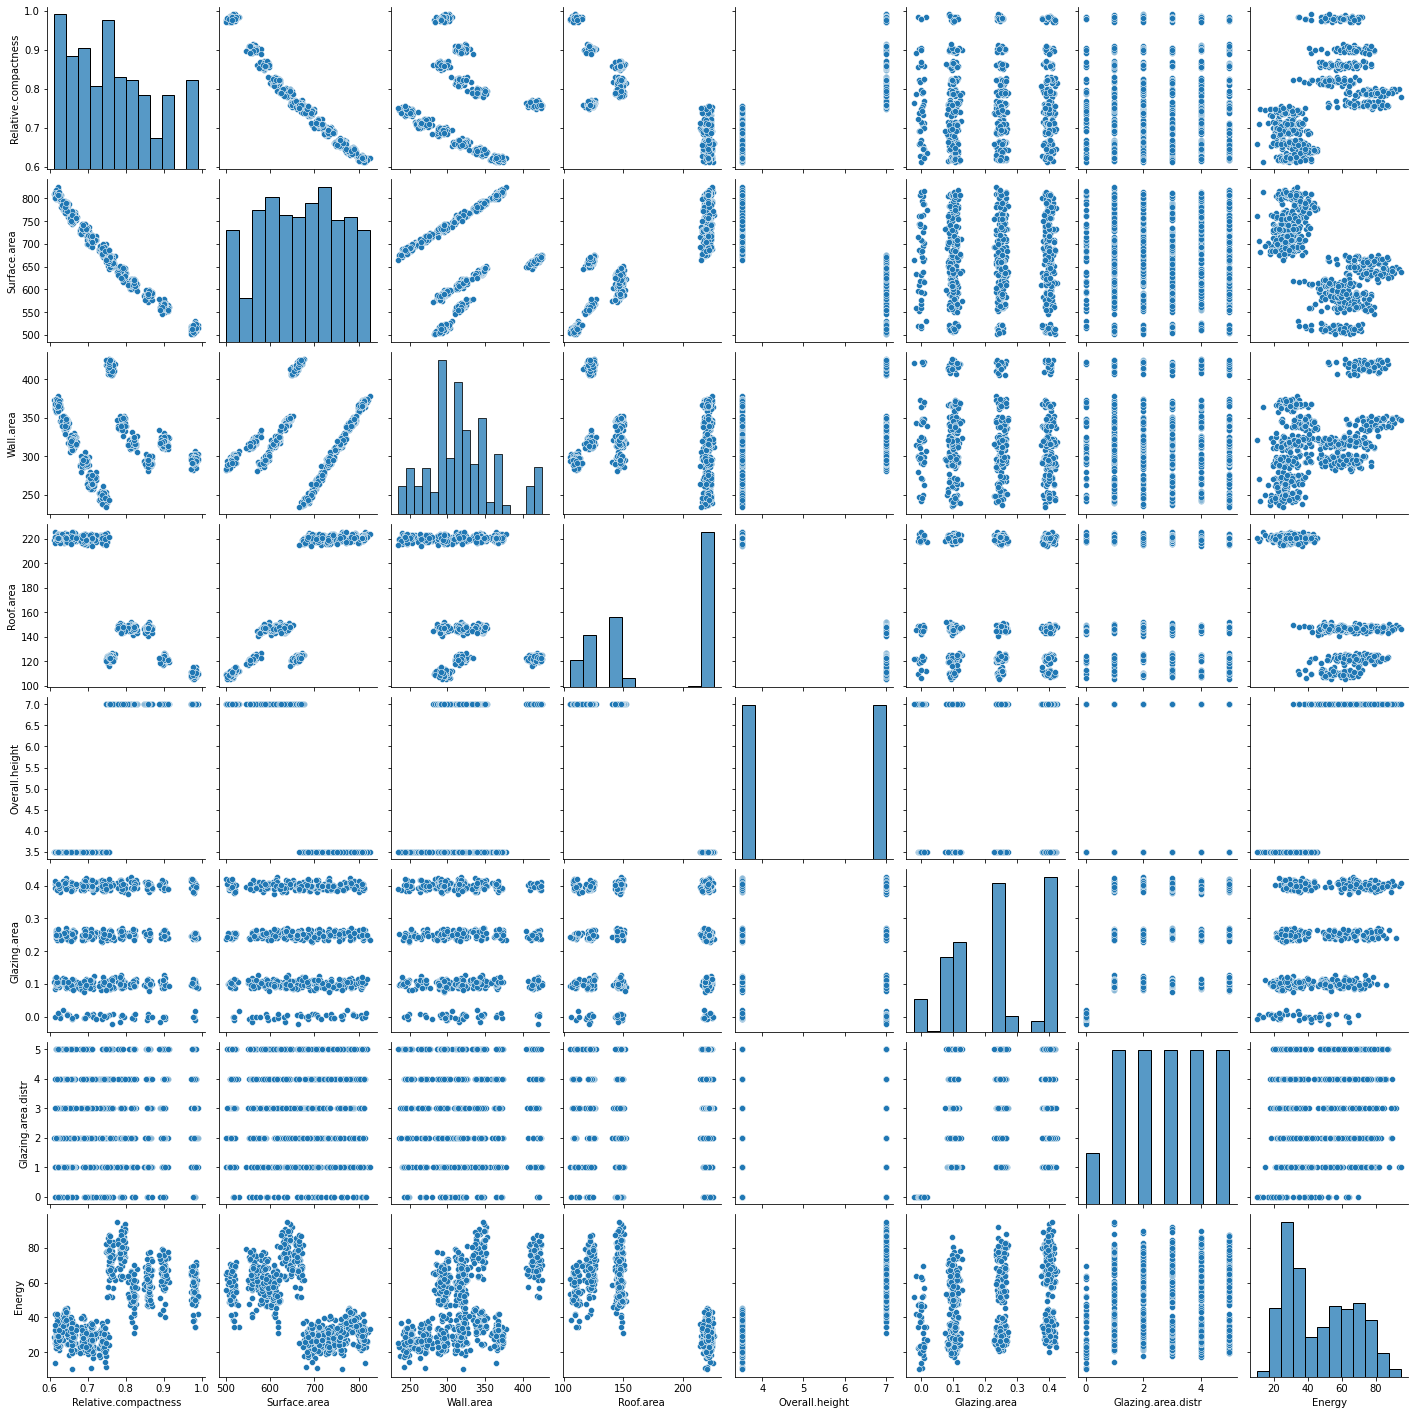

In [28]:
sns.pairplot(data)

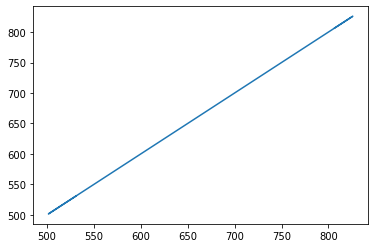

In [29]:
plt.plot(data["Surface.area"],2*data["Roof.area"]+data["Wall.area"])

In [30]:
data.describe()

,Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,Glazing.area,Glazing.area.distr,Energy
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.00000,768.000000
mean,0.764511,671.349569,318.331811,176.508879,5.25000,0.234347,2.81250,46.923575
std,0.105914,88.216217,43.942031,45.206368,1.75114,0.133144,1.55096,19.863003
min,0.612496,501.450033,234.338121,105.338876,3.50000,-0.024009,0.00000,10.211493
25%,0.677856,598.684672,291.800051,137.385287,3.50000,0.103055,1.75000,29.360416
50%,0.751687,673.069405,315.761457,183.308441,5.25000,0.247521,3.00000,41.761247
75%,0.835044,744.594128,342.981089,220.510532,7.00000,0.391185,4.00000,64.327196
max,0.991210,825.950839,425.805165,225.757721,7.00000,0.427021,5.00000,94.842601


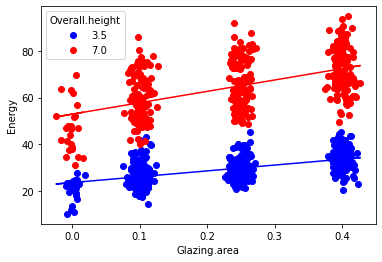

In [31]:
fit35 = np.polyfit(data["Glazing.area"][data["Overall.height"]==3.5],data["Energy"][data["Overall.height"]==3.5], 1)
fit70 = np.polyfit(data["Glazing.area"][data["Overall.height"]==7.0],data["Energy"][data["Overall.height"]==7.0], 1)
plt.plot(data["Glazing.area"][data["Overall.height"]==3.5],data["Energy"][data["Overall.height"]==3.5],'bo',label='3.5')
plt.plot(data["Glazing.area"][data["Overall.height"]==7.0],data["Energy"][data["Overall.height"]==7.0],'ro',label='7.0')
plt.plot(data["Glazing.area"],data["Glazing.area"]*fit35[0]+fit35[1],'b')
plt.plot(data["Glazing.area"],data["Glazing.area"]*fit70[0]+fit70[1],'r')
plt.xlabel("Glazing.area")
plt.ylabel("Energy")
plt.legend(title='Overall.height')
plt.show()

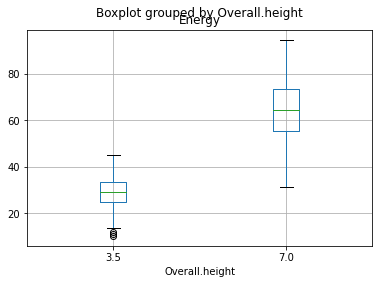

In [32]:
data.boxplot(column="Energy",by="Overall.height")
plt.show()

## ACP

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

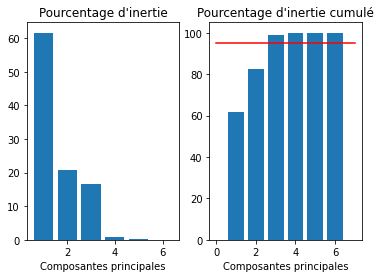

In [34]:
acp = PCA(svd_solver='full')
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
data_sc = sc.fit_transform(data[["Relative.compactness","Surface.area","Wall.area","Roof.area","Overall.height","Glazing.area"]])
coord = acp.fit_transform(data_sc)
eigval = (n-1)/n*acp.explained_variance_
plt.subplot(1,2,1)
plt.bar(range(1,7),eigval/sum(eigval)*100)
plt.xlabel('Composantes principales')
plt.title('Pourcentage d\'inertie')
plt.subplot(1,2,2)
plt.bar(range(1,7),np.cumsum(eigval/sum(eigval)*100))
plt.xlabel('Composantes principales')
plt.title('Pourcentage d\'inertie cumulé')
plt.plot(range(8),np.ones((8))*95,'r-')
plt.show()

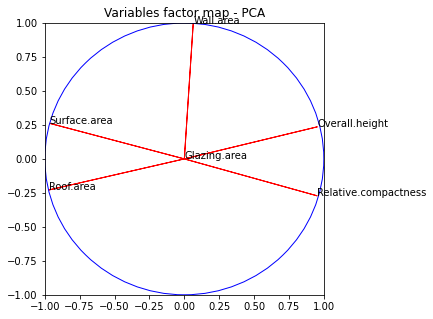

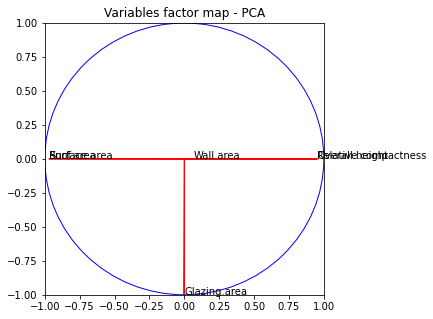

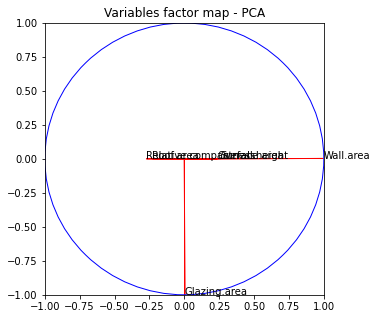

In [35]:
def cercle_correlation(axes1,axes2):
    coord1 = acp.components_[axes1] * np.sqrt(eigval[axes1])
    coord2 = acp.components_[axes2] * np.sqrt(eigval[axes2])
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot(1, 1, 1)
    for i, j, nom in zip(coord1, coord2, ["Relative.compactness","Surface.area","Wall.area","Roof.area","Overall.height","Glazing.area"]):
        plt.text(i, j, nom)
        plt.arrow(0, 0, i, j, color = 'r', width = 0.0001)
    plt.axis((-1, 1, -1, 1))
    #Cercle
    c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
    ax.add_patch(c)
    plt.title('Variables factor map - PCA')
    plt.show()
    
cercle_correlation(0,1)
cercle_correlation(0,2)
cercle_correlation(1,2)

In [36]:
#TODO

## Clustering

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans

### Analyse visuelle

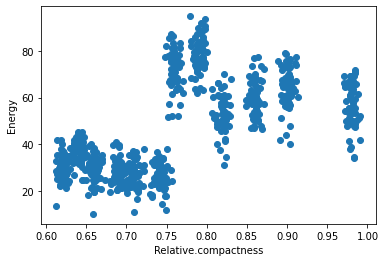

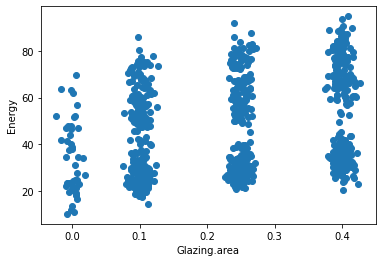

In [39]:
plt.plot(data["Relative.compactness"],data["Energy"],"o")
plt.xlabel("Relative.compactness")
plt.ylabel("Energy")
plt.show()
plt.plot(data["Glazing.area"],data["Energy"],"o")
plt.xlabel("Glazing.area")
plt.ylabel("Energy")
plt.show()

### Clustering hiérarchique

Le clustering sous R a été fait via la méthode de ```ward.D2```, méthode qui n'existe pas en python. Les résultats sont donc différents.

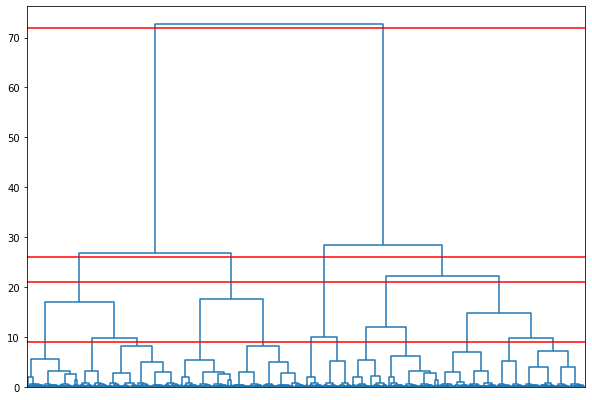

In [40]:
linked = linkage(data_sc,'ward')

plt.figure(figsize=(10, 7))
dend_output = dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            color_threshold=0.0,
            show_leaf_counts=True,
            no_labels=True)
plt.axhline(72,color='r')
plt.axhline(26,color='r')
plt.axhline(21,color='r')
plt.axhline(9,color='r')
plt.show()

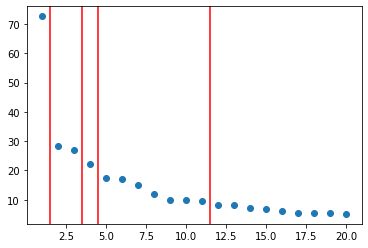

In [41]:
heights = np.array([])
for x,y,z,t in dend_output['dcoord'][:]:
    if y > 5:
        heights = np.append(heights,y)
heights[::-1].sort()
heights = heights[:20]
plt.plot(np.linspace(1,len(heights),len(heights)),heights,'o')
plt.axvline(1.5,color='r')
plt.axvline(3.5,color='r')
plt.axvline(4.5,color='r')
plt.axvline(11.5,color='r')


In [42]:
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2.fit_predict(data_sc)
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster4.fit_predict(data_sc)
cluster12 = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster12.fit_predict(data_sc);

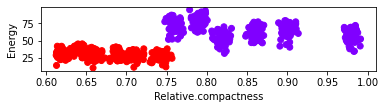

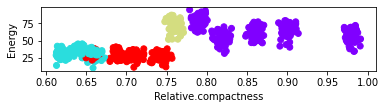

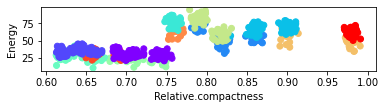

In [43]:
plt.subplot(3,1,1)
plt.scatter(data["Relative.compactness"],data["Energy"], c=cluster2.labels_, cmap='rainbow')
plt.xlabel("Relative.compactness")
plt.ylabel("Energy")
plt.show()
plt.subplot(3,1,2)
plt.scatter(data["Relative.compactness"],data["Energy"], c=cluster4.labels_, cmap='rainbow')
plt.xlabel("Relative.compactness")
plt.ylabel("Energy")
plt.show()
plt.subplot(3,1,3)
plt.scatter(data["Relative.compactness"],data["Energy"], c=cluster12.labels_, cmap='rainbow')
plt.xlabel("Relative.compactness")
plt.ylabel("Energy")
plt.show()

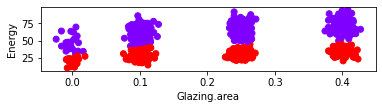

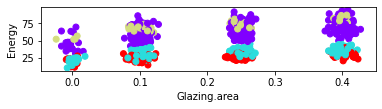

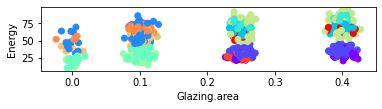

In [44]:
plt.subplot(3,1,1)
plt.scatter(data["Glazing.area"],data["Energy"], c=cluster2.labels_, cmap='rainbow')
plt.xlabel("Glazing.area")
plt.ylabel("Energy")
plt.show()
plt.subplot(3,1,2)
plt.scatter(data["Glazing.area"],data["Energy"], c=cluster4.labels_, cmap='rainbow')
plt.xlabel("Glazing.area")
plt.ylabel("Energy")
plt.show()
plt.subplot(3,1,3)
plt.scatter(data["Glazing.area"],data["Energy"], c=cluster12.labels_, cmap='rainbow')
plt.xlabel("Glazing.area")
plt.ylabel("Energy")
plt.show()

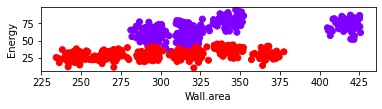

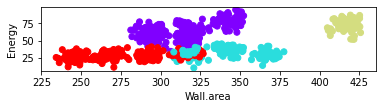

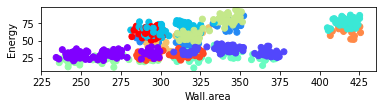

In [45]:
plt.subplot(3,1,1)
plt.scatter(data["Wall.area"],data["Energy"], c=cluster2.labels_, cmap='rainbow')
plt.xlabel("Wall.area")
plt.ylabel("Energy")
plt.show()
plt.subplot(3,1,2)
plt.scatter(data["Wall.area"],data["Energy"], c=cluster4.labels_, cmap='rainbow')
plt.xlabel("Wall.area")
plt.ylabel("Energy")
plt.show()
plt.subplot(3,1,3)
plt.scatter(data["Wall.area"],data["Energy"], c=cluster12.labels_, cmap='rainbow')
plt.xlabel("Wall.area")
plt.ylabel("Energy")
plt.show()

In [ ]:
data_quanti = data[['Relative.compactness','Surface.area','Wall.area','Roof.area','Overall.height','Glazing.area','Energy']]

In [52]:
kmres2 = KMeans(n_clusters=2, random_state=0).fit(data_sc)
kmclus2 = kmres2.labels_

# data_sc['kmclus2'] = kmclus2
# sns.pairplot(data_sc,hue=kmclus2)
data_sc

array([[ 2.06354891, -1.59779472, -0.26978586, -1.42785711,  1.        ,
        -1.64028261],
       [ 2.06940357, -1.71823173, -0.42254712, -1.47112377,  1.        ,
        -1.83179171],
       [ 2.0307258 , -1.75998775, -0.34061239, -1.55168694,  1.        ,
        -1.7664867 ],
       ...,
       [-1.32453074,  1.61047796,  1.22228948,  0.97730027, -1.        ,
         1.18699929],
       [-1.31952042,  1.55819072,  1.12798061,  0.97211893, -1.        ,
         1.22674302],
       [-1.33630166,  1.53490023,  1.06537896,  0.97981966, -1.        ,
         1.27954737]])